<img src="https://firebasestorage.googleapis.com/v0/b/kepingai.appspot.com/o/keping_logo_filled.png?alt=media&token=9d5538d7-4eeb-4070-b26f-c2603131db23" width="100" height="100" />

# **PT IDABAGUS ENGINEERING INDONESIA (KepingAI)**

## **Company Overview:**
Congratulations on passing the 2nd recruitment process for the Data Scientist Intern position at Keping AI!

PT Idabagus Engineering Indonesia (KepingAI) is an Artificial Intelligence (AI) startup based in Jakarta, Indonesia. Our mission is to democratize AI to many industries in Indonesia. Currently, we are focussing on delivering AI in retail and finance industries. As demand of AI solutions is high right now, we are also providing AI to several global companies. As a potential Data Science Intern, you will get invaluable experience to analyze and improve our AI model. This is your opportunity to showcase your data science skills into a real working product.

In this Take-Home Assignments ("**THA**"), you are assigned to analyze an AI model that runs our cryptocurrency bot. You will do performance analysis using common metrics, such as accuracy, precision, recall, confusion matrix and others. From these metrics, you are encouraged to provide your analysis on how to improve the model performance.

## **Terms and Conditions:**
1. Candidate must use dataset attached to the email and/or in this instruction wisely. Candidate are required to maintain the confidentiality of this Take-Home Assignment until the recruitment process is done. Distribution to external party of Take-Home Assignment Instruction and Take-Home Assignment Dataset is strictly prohibited by KepingAI Recruitment Team.
2. Our official recruitment process email is from recruiting@kepingai.com. If you receive any kind of communication from email apart from our official email. Please ignore and report such matter to us. The Company is not responsible for any events related to the recruitment process that originate from email other than recruiting@kepingai.com.

## **THA DATASET:**
**KEPINGAI_INT-DS_THA_DATASET_120521v1.csv**

This file is attached in the email. This CSV file contains 2k historical data of KepingAI <code>scalping</code> signal strategies that is recorded since the beginning of April 2021. If you did not received this data within the email, please contact recruiting@kepingai.com.

## **Free GPU access Google Colab (Optional):**
1. https://colab.research.google.com/ open this link.
2. Click the **NEW NOTEBOOK** button.
3. Upload **KEPINGAI_INT-DS_THA_NOTEBOOK_120521v1.ipynb** file to Google Colab: File->Upload Notebook.
4. Enable GPU runtime: Runtime > Change Runtime Type > Hardware accelerator > GPU > Save.

## **What is scalping?**
Scalping is a specific trading strategy that follows set of pre-defined algorithmic rules, profiting from market volatility. Usually we targets small profits of 1%-5% but with large number of trades. Combination of small profits and large number of trades result in sizeable accumalative profit at the end. 

## **What is in this data?**
1. Each row of this data represents historical trades. This dataset contains historical trades generated from AI model with 3 columns, such as `trades`, `prediction` and `label`. 
2. `trades` is an ID that represents a unique trade in the crypto market.
3. `prediction` is the model's sigmoid output. You can also think of this column as model's confidence level. Confidence level near 1.0 indicates the model is highly confident in taking the trades. 
4. `label` is the actual result of the trade (profit or loss). `1.0` indicates a profitable trade and `0.0` is a losing one.

## **Your Objective?**
1. You are required to do performance analysis using common metrics in data science. 
2. From these observation, you can outline your thesis on how to improve the model performance. 


Let's continue!

## **1. Preparation**
Read the data from csv file, you can use **pandas** library to visualize the csv file easily.

In [1]:
# Import the module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Import the dataset to dataframe
df = pd.read_csv('./KEPINGAI_INT-DS_THA_DATASET_120521v1.csv' )

# Clean the dataset from unused column
df.drop(columns=['Unnamed: 0'],inplace=True)

df

,trade,prediction,label
0,trade_0,0.837522,1.0
1,trade_1,0.691110,0.0
2,trade_2,0.892783,1.0
3,trade_3,0.944666,1.0
4,trade_4,0.638593,1.0
...,...,...,...
1995,trade_1995,0.603576,1.0
1996,trade_1996,0.889247,1.0
1997,trade_1997,0.674640,0.0
1998,trade_1998,0.485074,0.0


In [2]:
# Check if there any null value
df.isnull().sum()

# Since there aren't any missing value, then the dataset is good to be used

trade         0
prediction    0
label         0
dtype: int64

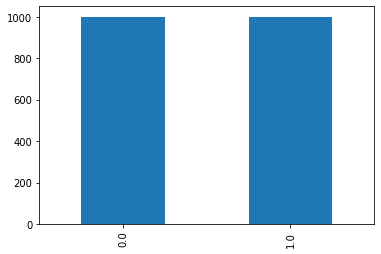

In [3]:
# Visualisation of label value distribution 
df['label'].value_counts().plot(kind='bar')

As you can see, there are three columns in our csv dataset.
1. `trades` represents a single trade ID. Think of a trade that you buy Bitcoin, it goes up in price and you sell it with a nice profit. 
2. `prediction` is prediction from the AI model whether to take the trade or not. We want the model to take a profitable trade and avoid a losing one. This column contains values ranging from `0.0` to `1.0`. Think of this as confidence level of the AI model. If you want to know more about confidence level, refer to this [article](https://towardsdatascience.com/how-to-use-confidence-scores-in-machine-learning-models-abe9773306fa).
3. `label` is the actual result of a trade. `1.0` indicates a profitable trade and `0.0` is a losing one. Note that this is binary as we only have either a profitable trade or a losing one.

The idea is we want the model to have output close to the label. In this task, you do not have to build the AI model. But, you are encouraged to optimize current model to have closer output to the label.

## **2. Model Action**
First thing first, we want our model to output `1.0` and `0.0` in real application. In this case, `1.0` means we can take the trade as it is profitable. And we will not take a trade with the model outputs `0.0` as it is a losing one.

However, in our dataset the model have output (column `prediction`) in form of confidence level, a float ranging from `0.0` to `1.0`. The easiest way to convert this confidence level to binary `0.0` and `1.0` is to use threshold. Let say we have threshold `0.5`. If confidence level is higher than `0.5` threshold, it means the model output `1.0`, which indicates a profitable trade. If it falls below `0.5` threhold, then the model output `0.0`, not to take the trade.

**Task #1 : Create a new column in the dataset named `action`. This columns must contains the model action of whether to take the trade or not based on its prediction confidence level.**

In [4]:
# Set the threshold
threshold = 0.5

# Make a new column based on the threshold condition

# The value is make to match 'label' column
# The profitable is 1.0
# The losing one is 0.0
df['action'] = np.where(df['prediction']>= threshold, 1.0, 0.0)
df.head()

,trade,prediction,label,action
0,trade_0,0.837522,1.0,1.0
1,trade_1,0.691110,0.0,1.0
2,trade_2,0.892783,1.0,1.0
3,trade_3,0.944666,1.0,1.0
4,trade_4,0.638593,1.0,1.0


## **3. Evaluate The Model Performance**
Now you have a model that can predict whether a specic trade is profitable or not. But, we do not know if the model is good enough in doing this prediction. Accuracy, precision, recall and F1 score are common metrics used to evaluate model performance.

**Task #2 : Calculate these 4 metrics along with the confusion matrix. If you have others metrics, feel free to provide them in this task. Use `0.5` threshold.**

In [5]:
# To analyze the dataset, it's better to used a copy of it so the main dataset could be used again
# In this matter, I used df1 as a copy of df
df1 = df

# Finding True Positive, True Negative, False Positive, and False Negative
trueP = 0 # True Positive
falseP = 0 # False Positive
falseN = 0 # False Negative
trueN = 0 # True Negative

# In TASK 1, column 'action' made using threshold of 0.5
# So, we could use column 'action' in this dataset with threshold 0.5
for x in range(0,df1.shape[0]):
    if df1['action'][x] == 1:
        if df1['action'][x] == df1['label'][x]:
            trueP = trueP+1
        elif df1['action'][x] != df1['label'][x]:
            falseN = falseN+1
    elif df1['action'][x] == 0:
        if df1['action'][x] == df1['label'][x]:
            falseP = falseP+1
        elif df1['action'][x] != df1['label'][x]:
            trueN = trueN+1

# Sum up all the variable as total
total = trueP + falseP + trueN + falseN

# Finding all 4 metrics: Accuracy, Precision, Recall, and F1 Score

# Accuracy = ( True Postive + True Negative ) / Total
accuracy = (trueP + trueN)/total

# Precision = True Positive / (True Positive + False Positive)
# it rounded to 2 decimal
precision = trueP/(trueP+falseP)
precision = round(precision,2)

# Recall = True Positive / (True Positive + False Negative)
recall = trueP/(trueP+falseN)
recall = round(recall,2)

# F1score = 2*(Recall * Precision) / (Recall + Precision)
F1score = 2*(recall * precision) / (recall + precision)
F1score = round(F1score,2)

# Print all metrics value
print('Accuracy is ' + str(accuracy))
print('Precision is '+ str(precision))
print('Recall is '+ str(recall))
print('F1 Score is '+ str(F1score))

Accuracy is 0.5
Precision is 0.57
Recall is 0.72
F1 Score is 0.64


Now, you have the 4 metrics and the confusion matrix. From this observations, please outline your thesis on model performance. Is a good enough model or not?

**Answer**

From the metrics above, we could see that this model has good Recall, above 70%. However, the accuracy, precision, F1 Score pretty low, below 70%. This means that this model most likely has huge gap between Precision and Recall, and it means that most likely this model could represent the correct answer but didn't have many True Positive answer.

## **4. Tweak The Threshold**
You may be thinking. It is possible to improve the model by changing the threshold. This is common in machine learning practices where we tweak the threshold to have a better performing model. 

In this section, you are required to plot a line chart that pictures the model performance respective to the threshold. The x-axis of your chart is for threshold ranging from `0.0` to `1.0` and the y-axis is for accuracy, precision, recall, and F1 score. As we have these 4 metrics for y-axis, we would have 4 lines in the chart.

**Task #3 : Create metrics vs threshold line chart.**

Text(0.5, 1.0, 'Metric vs Threshold')

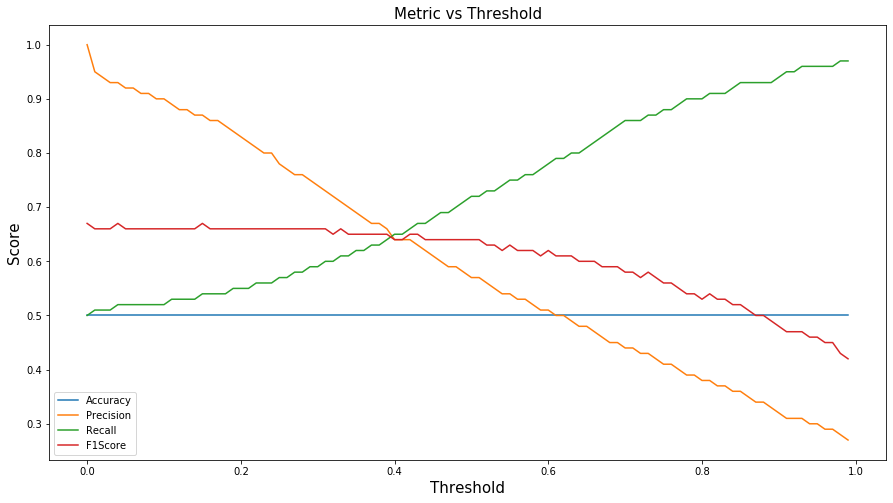

In [6]:
# Make all necessary list
# cp is list of point of contact between each metrics line
cp=[]

# List below needed for saving the metrics value
accuracy = []
precision = []
recall = []
F1score = []

tp = []
fp = []
fn = []
tn = []
ck = []

# Step is the difference value between each threshold tested
# In this case, the threshold used between 0 to 1, so the step I choose is 0.01 to make enough number of data
step = 0.01

# Finding all metrics value for all threshold
for i in np.arange(0, 1, step):
    df1['action'] = np.where(df1['prediction']>= i, 1, 0)
    
    trueP = 0
    falseP = 0
    falseN = 0
    trueN = 0

    for x in range(0,df1.shape[0]):
        if df1['action'][x] == 1:
            if df1['action'][x] == df1['label'][x]:
                trueP = trueP+1
            elif df1['action'][x] != df1['label'][x]:
                falseN = falseN+1
        elif df1['action'][x] == 0:
            if df1['action'][x] == df1['label'][x]:
                falseP = falseP+1
            elif df1['action'][x] != df1['label'][x]:
                trueN = trueN+1
    
    cek = trueP + falseP + trueN + falseN 
    ck.append(cek)
    
    tp.append(trueP)
    fp.append(falseP)
    fn.append(falseN)
    tn.append(trueN)
    
    acc = (trueP + trueN)/cek
    accuracy.append(acc)
    
    prec = trueP/(trueP+falseP)
    prec = round(prec,2)
    precision.append(prec)
    
    rec = trueP/(trueP+falseN)
    rec = round(rec,2)
    recall.append(rec)
    
    F1sc = 2*(rec * prec) / (rec + prec)
    F1sc = round(F1sc,2)
    F1score.append(F1sc)
    
    if prec == rec or prec == F1sc or rec == F1sc:
        cp.append(i)

# Make new dataframe from every metrics
dfn = pd.DataFrame({'Step':np.arange(0, 1, step),'Accuracy':accuracy,'Precision':precision,'Recall':recall,'F1Score':F1score})
dfn = dfn.set_index('Step')

# Make the plot of every metrics
plt.rcParams["figure.figsize"] = (15,8)

plt.plot(dfn.index, dfn['Accuracy'], label=dfn.columns[0])
plt.plot(dfn.index, dfn['Precision'], label=dfn.columns[1])
plt.plot(dfn.index, dfn['Recall'], label=dfn.columns[2])
plt.plot(dfn.index, dfn['F1Score'], label=dfn.columns[3])

plt.legend()

plt.xlabel('Threshold',size = 15)
plt.ylabel('Score',size = 15)
plt.title('Metric vs Threshold',size = 15)

Now you have a chart showing the model's behavior respective to the threshold. What do you see from this chart? How the relationship between precision and recall? Outline the behavior of the model.

**Answer**

From the chart above, it shows that at low threshold, Precision usually has higher value than Recall, however at higher threshold, Recall has higher value than Precision. In other hand, F1 Score and accuracy has tendency to have similar value, however after 0.4 Threshold, F1 Score value drop. The drop of F1 Score value means this model bad for use in higher threshold.


Now you understand the behavior of the model. If you are asked to determine one threshold for the model to operate, what would be the threshold? Please outline the reason you choose the threshold.

**Answer**

To choose the best threshold, it's better at 0.4 threshold. Because at that point Precision, Recall, and F1 Score have similar value. At that point also it the edge of F1 Score value that didn't start dropping. 

## **5. Measure The Intinsic Performance of The Model**
Now, we know that the model can have different performances on different thresholds. But, we still do not know whether the model itself is actually good or not. One of common metrics to evaluate the model irrespective of the threshold is to use ROC-AUC Curve. 

**Task #4 : Plot the ROC Curve and calculate the AUC values of the model.**

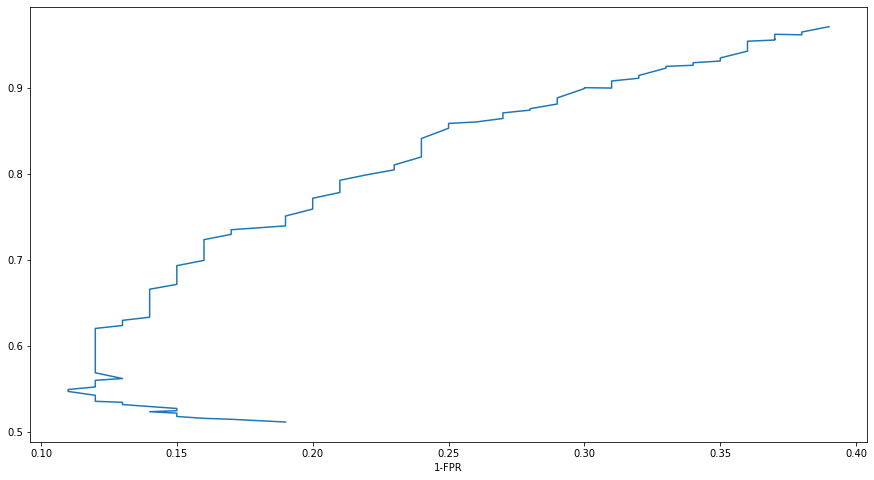

In [8]:
dfs = pd.DataFrame({'Step':np.arange(0, 1, step),'True Positive':tp,'True Negative':tn,'False Positive':fp,'False Negative':fn})
dfs = dfs.set_index('Step')

# Finding TPR & FPR 
tpr=[] # List of TPR
fpr=[] # List of FPR
x_ax=[] # List of 1-FPR

# It need to be -1 because in 
for x in range(0,dfs.shape[0]-1):
    i=x+1
    
    # TPR = True Positive / ( True Positive + False Negative)
    tpr.append(tp[i]/(tp[i]+fn[i]))
    
    # FPR = False Positive / (False Positive + True Negative)
    fpr.append(fp[i]/(fp[i]+tn[i]))
    
    # 1-FPR
    x_ax.append(round(1-fpr[x],2))
    
# For finding ROC-AUC it's better to used another dataset
dfa = pd.DataFrame({'TPR':tpr,'FPR':fpr,'1-FPR':x_ax})

# Set 1-FPR as an index, so when plot 1-FPR will be x axis
dfa = dfa.set_index('1-FPR')

# Plot the ROC
dfa['TPR'].plot(kind='line')

What information do you get from these metrics? Do we have to improve the model? Outline you reason if it needs some improvement and what would it be.

**Answer**

=== Write your answer here. Double click to edit ===

